# Introduction
- Name : Harun Hawari Ash Shiddiq
- Dataset :
    - https://www.kaggle.com/mehmetsabrikunt/internet-service-churn
- Objective : Prediction whether the customer churn or not

# Import Libarary

In [1]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import probplot, skew

# Packages for Feature Engineering and Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.ensemble import ExtraTreesClassifier
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Packages for Modelling and Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Packages for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('internet_service_churn.csv')
pd.set_option('display.max.columns', None)
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


**Data set information**
- is_tv_subscriber : customer has a tv subscription ?
- is_movie_package_ : is he/she has a sinema movie package subs
- subscription_age : how many year has the customer use our service
- bill_avg : last 3 months bill avg
- reamining_contract : how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time
- service_failure_cou : customer call count to call center for service failure for last 3 months
- download_avg : last 3 months internet usage (GB)
- upload_avg : last 3 months upload avg (GB)
- download_over_lim : most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over
- churn : this is the target column. if 1 customer canceled his service

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [4]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


# Data Cleaning

In [5]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [6]:
df['is_tv_subscriber'].replace({0:'no',1:'yes'}, inplace=True)
df['is_movie_package_subscriber'].replace({0:'no',1:'yes'}, inplace=True)

In [7]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
id,0,0.0
is_tv_subscriber,0,0.0
is_movie_package_subscriber,0,0.0
subscription_age,0,0.0
bill_avg,0,0.0
reamining_contract,21572,30.0
service_failure_count,0,0.0
download_avg,381,1.0
upload_avg,381,1.0
download_over_limit,0,0.0


>From the collection of information data, it is known that the contract reamining_contract is a customer who does not have a contract that will be imputed with 0 line no contract and a missing value below 5% will be dropped

In [8]:
df['reamining_contract'].fillna(0, inplace=True)
df.dropna(inplace=True)

**Check data duplicated**

In [9]:
print('Is there any duplication of data: {}'.format(df.duplicated().any()))
print('Amount of data duplication: {}'.format(df.duplicated().sum()))

Is there any duplication of data: False
Amount of data duplication: 0


# Eksplorasi Data

In [10]:
# Set style for EDA
plt.style.use('fivethirtyeight')

**Periksa komposisi label**

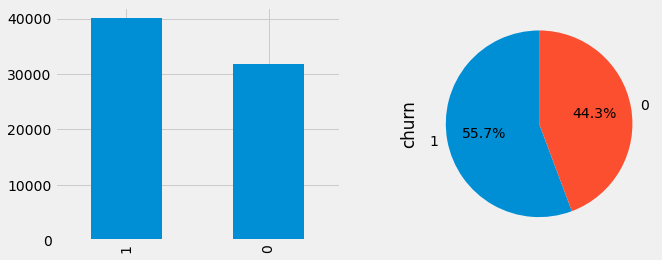

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['churn'].value_counts().plot(kind='bar', ax=ax[0])
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1])
plt.show()

**From the picture we know that data is balance**

In [12]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,yes,no,11.95,25,0.14,0,8.4,2.3,0,0
1,18,no,no,8.22,0,0.00,0,0.0,0.0,0,1
2,23,yes,no,8.91,16,0.00,0,13.7,0.9,0,1
3,27,no,no,6.87,21,0.00,1,0.0,0.0,0,1
4,34,no,no,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,yes,yes,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,yes,no,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,yes,no,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,no,no,0.01,0,0.72,0,0.0,0.0,0,1


**Check Correlation between feature** 

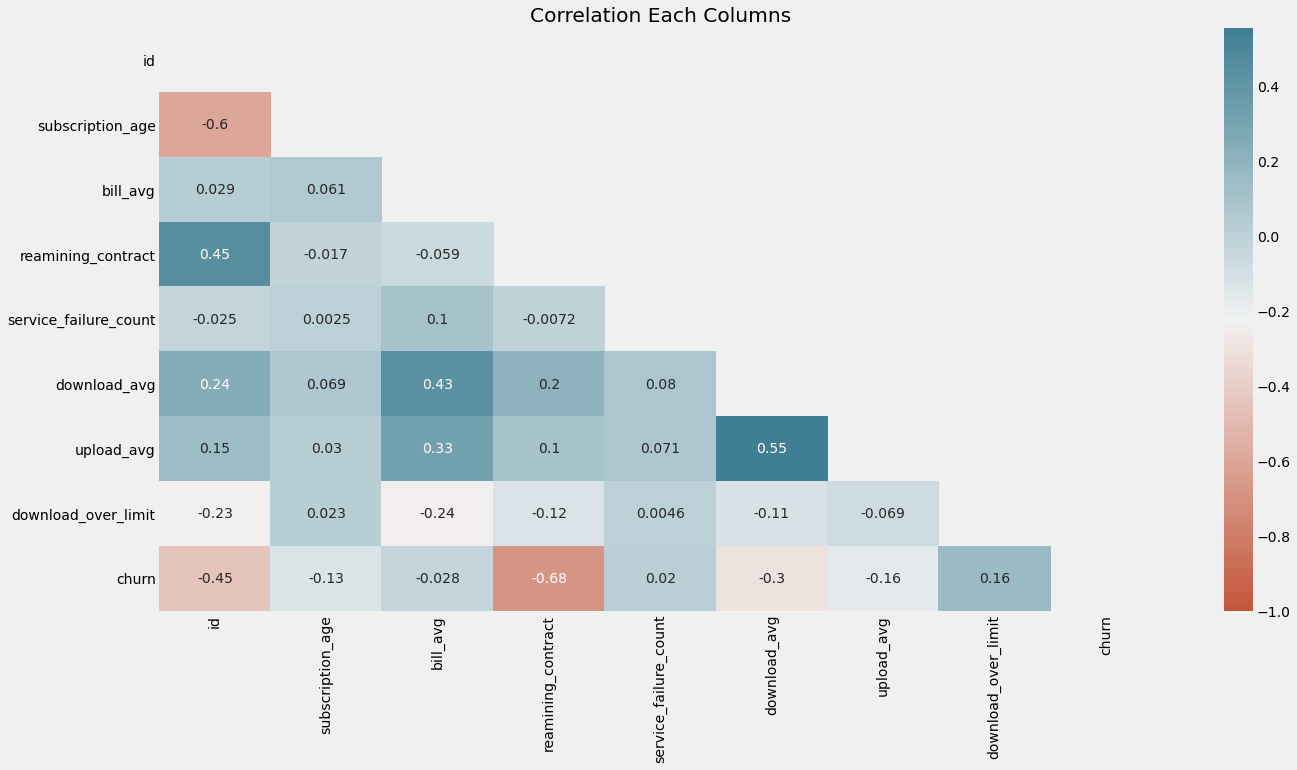

In [13]:
corr_matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True), mask=corr_matrix, vmin=-1, annot=True)
plt.title('Correlation Each Columns');

In [14]:
corr=df.corr()
corr['churn'].sort_values(ascending=False)

churn                    1.000000
download_over_limit      0.157626
service_failure_count    0.019680
bill_avg                -0.027550
subscription_age        -0.126672
upload_avg              -0.162690
download_avg            -0.298063
id                      -0.448660
reamining_contract      -0.681629
Name: churn, dtype: float64

>It is known that the largest correlation is reamining_contract, download_over_limit, anda upload_avg. As we know although id is numerical but actually its a categorical which is representation of all customer names

<Figure size 720x432 with 0 Axes>

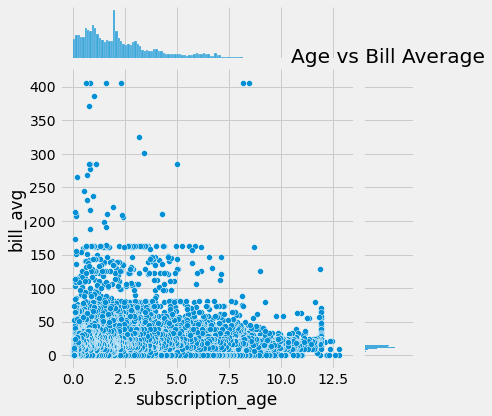

In [15]:
plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'subscription_age', y = 'bill_avg', kind =  'scatter')
plt.title('Age vs Bill Average')
plt.show()

>Here we can see that most of the customer who has just started the service has higher average bill and most older customer has lower average bill. This is not a very important interpretation because it can be depend on the speed and package the customer has

<Figure size 720x432 with 0 Axes>

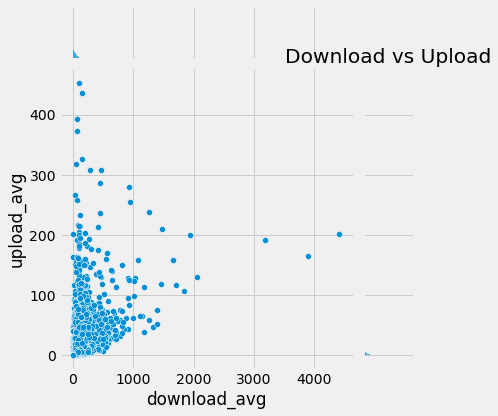

In [16]:
plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'download_avg', y = 'upload_avg', kind =  'scatter')
plt.title('Download vs Upload')
plt.show()

>Here most of the download and upload speed relay within 1000 and 100 and we there are some exceptional data point which may be outliers in the dataset

**Splitting data for visualization**

In [17]:
df_cat = df[['is_tv_subscriber','is_movie_package_subscriber','service_failure_count','download_over_limit','churn']]
col_cat = df_cat.columns
col_cat

Index(['is_tv_subscriber', 'is_movie_package_subscriber',
       'service_failure_count', 'download_over_limit', 'churn'],
      dtype='object')

In [18]:
df_num = df[['subscription_age','bill_avg','reamining_contract','download_avg','upload_avg']]
col_num = df_num.columns
col_num

Index(['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg',
       'upload_avg'],
      dtype='object')

**Looping for barplot visualization**

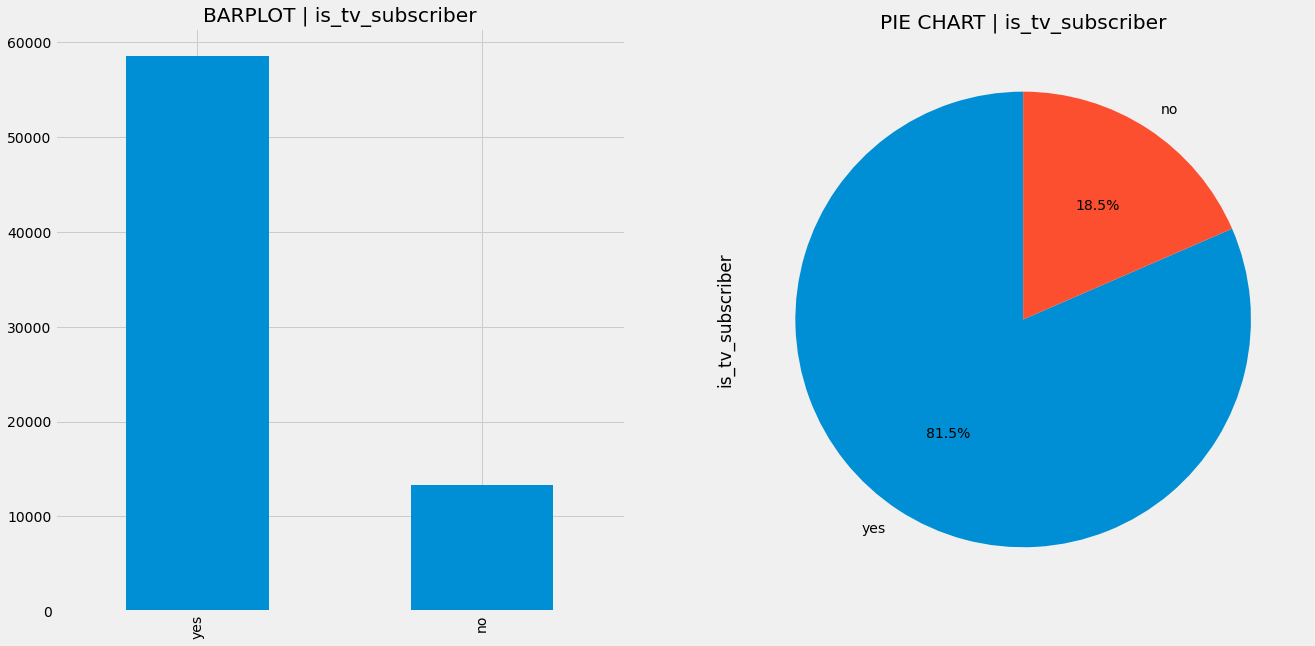

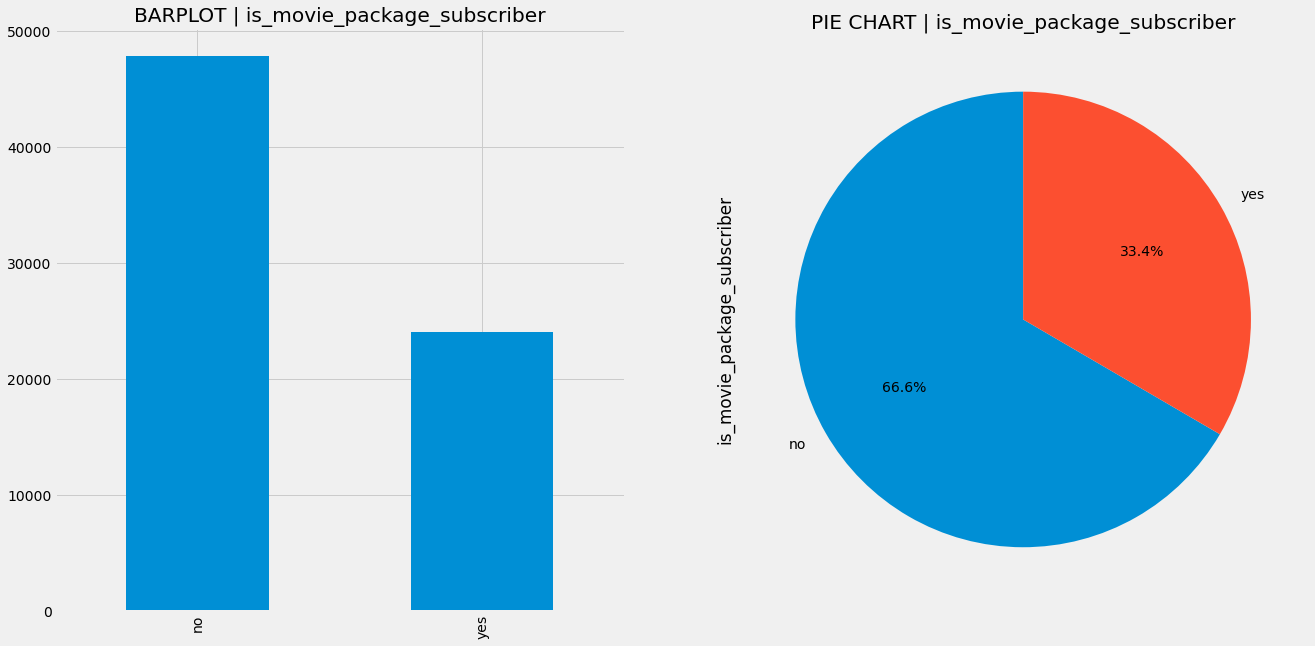

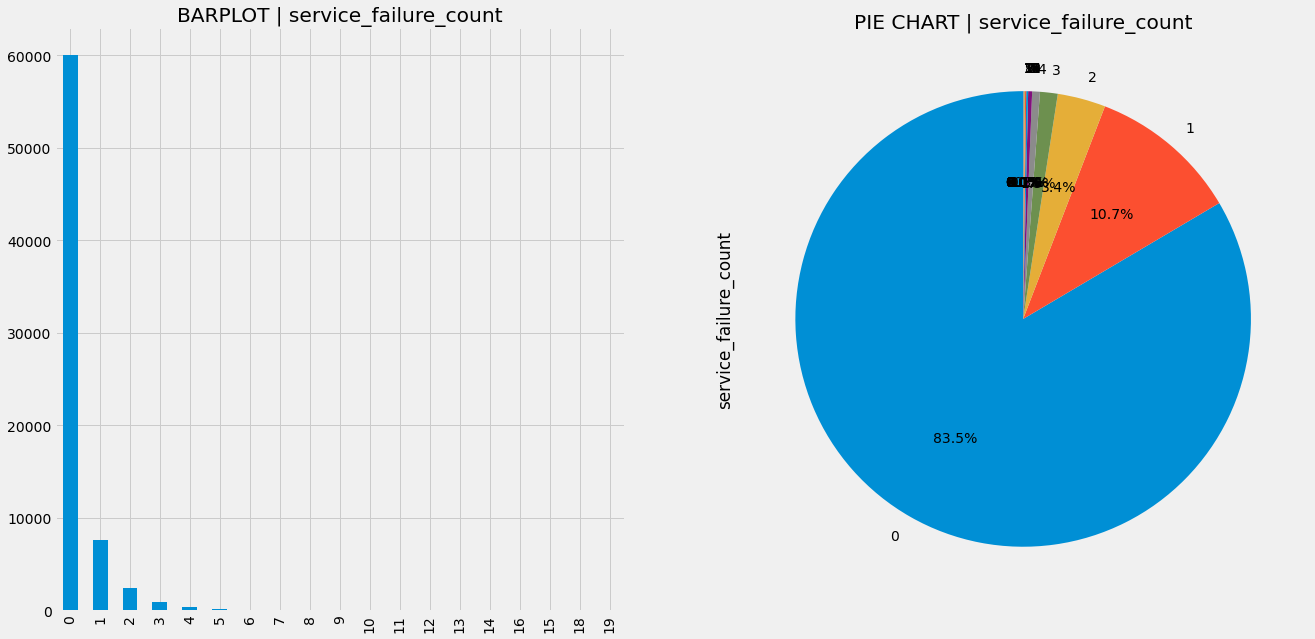

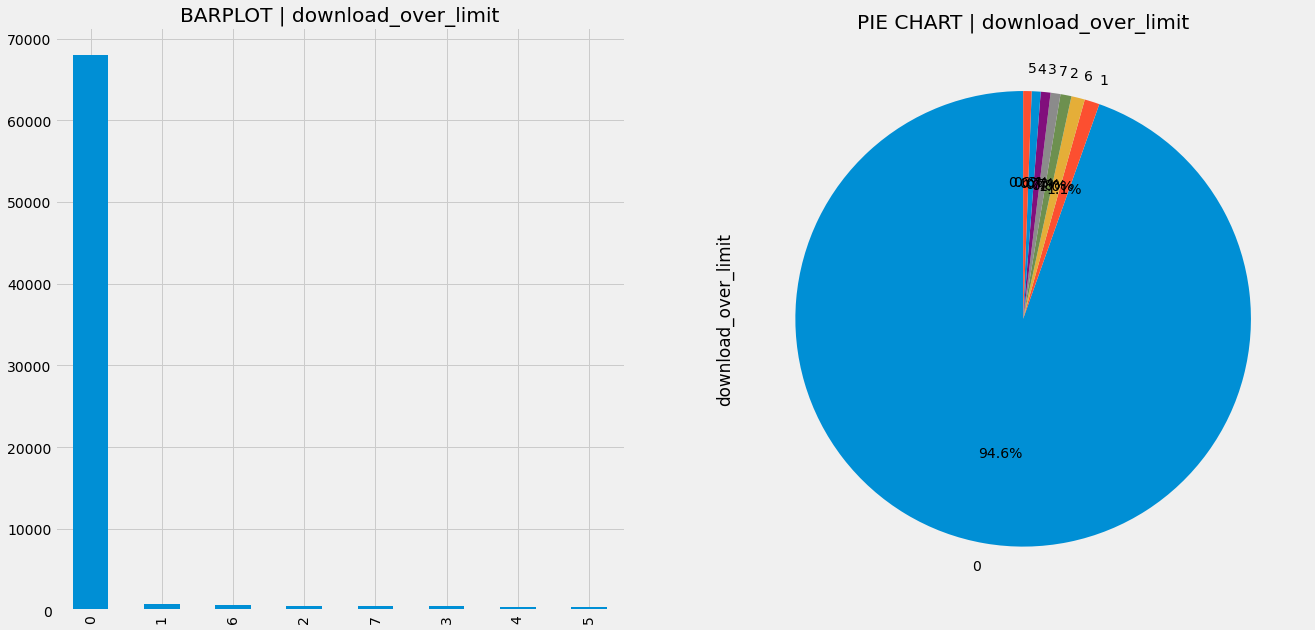

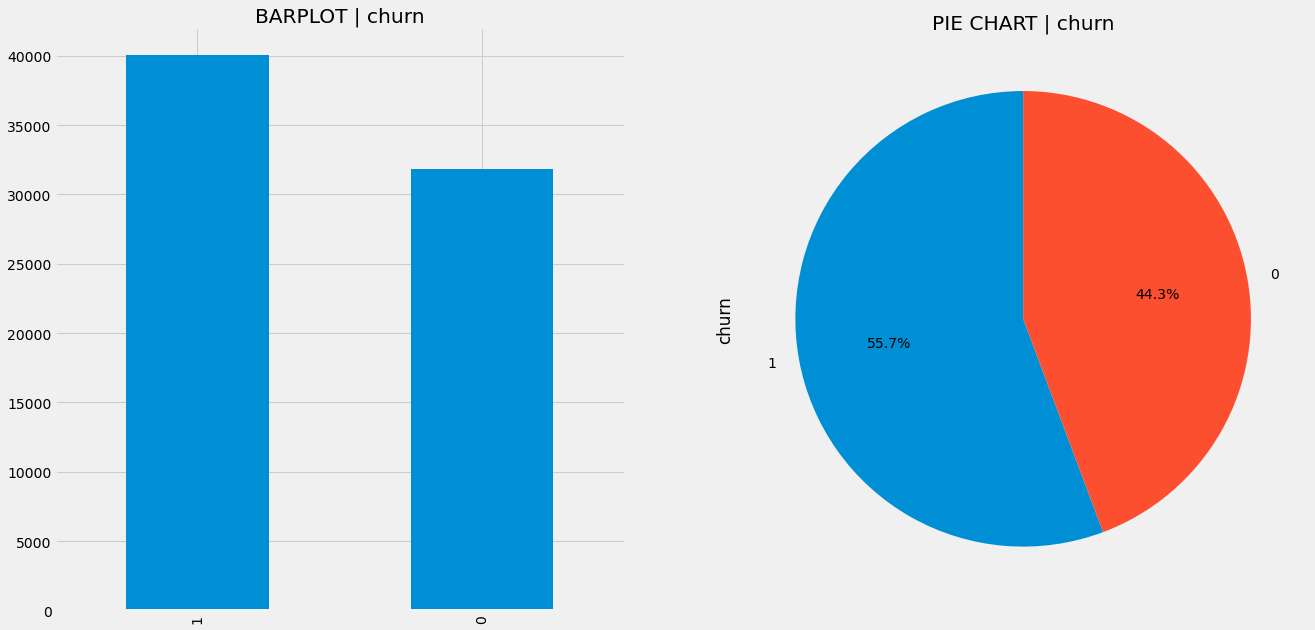

In [19]:
for i in col_cat:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    df_cat[i].value_counts().plot(kind='bar', ax=ax[0])
    df_cat[i].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1])
    ax[0].set_title('BARPLOT | '+ str(i))
    ax[1].set_title('PIE CHART | '+ str(i))
    plt.show()

>- From the graph above, we know that most customers subscribe to TV and don't subscribe to movies
>- as many as 83.5% did not call customer service then there were 16.5% of customers who complained
>- only a few customers whose downloads are above the limit

**How do unique features affect labels?**

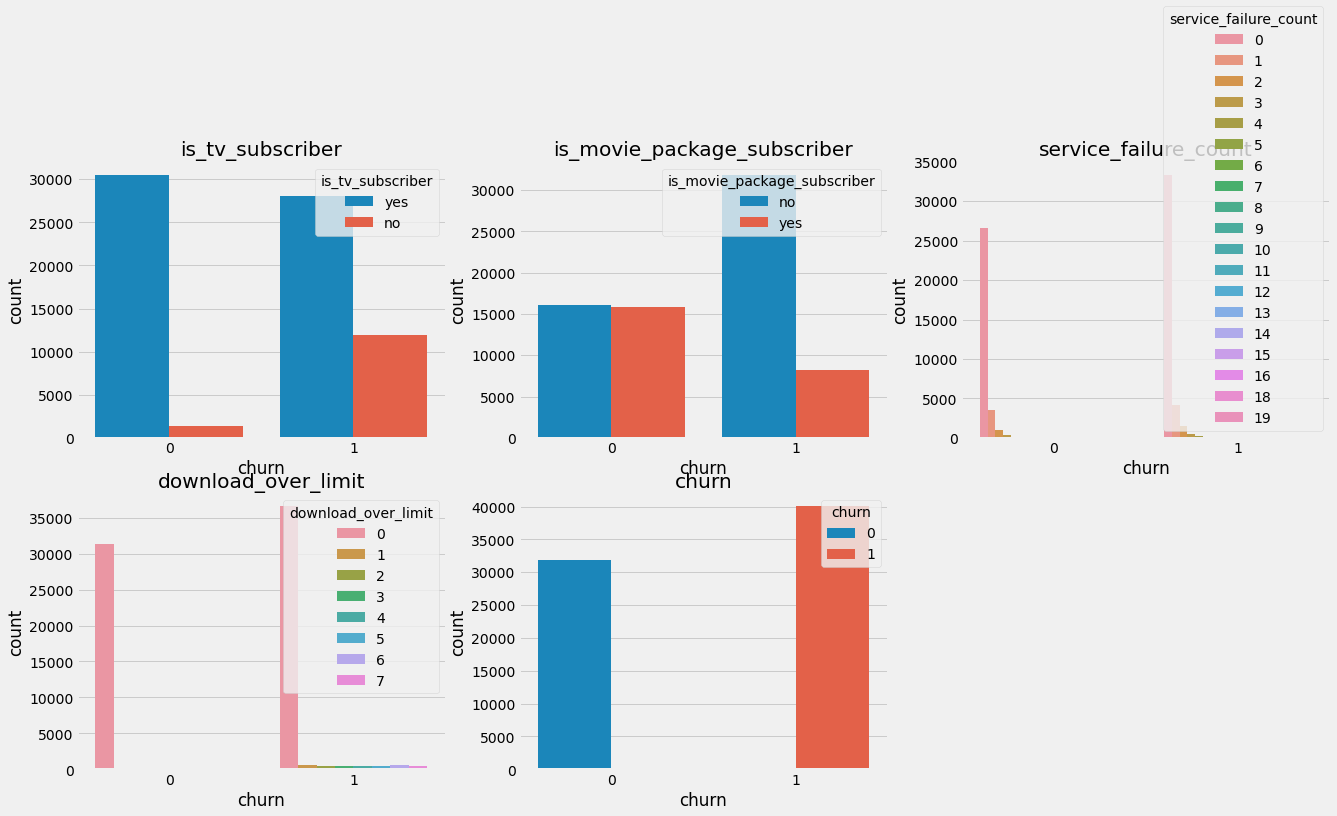

In [20]:
plt.figure(figsize=(20,90))
for i, col_cat in enumerate(df_cat):
    ax = plt.subplot(16, 3, i+1)
    sns.countplot(x=df_cat['churn'], hue=df_cat[col_cat], data= df_cat, ax=ax)
    plt.title(col_cat)
plt.show()

- Most customers who subscribe to TV stop using internet services, while most customers who subscribe to movies don't stop using the internet service
- whether it's customers who call and don't call customer service, there are customers who stop using the internet service significantly the same
- There is customer who reach the download limit stop internet subscription

**Now let's look at the distribution of and skewness value of numerical data**

In [21]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,yes,no,11.95,25,0.14,0,8.4,2.3,0,0
1,18,no,no,8.22,0,0.00,0,0.0,0.0,0,1
2,23,yes,no,8.91,16,0.00,0,13.7,0.9,0,1
3,27,no,no,6.87,21,0.00,1,0.0,0.0,0,1
4,34,no,no,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,yes,yes,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,yes,no,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,yes,no,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,no,no,0.01,0,0.72,0,0.0,0.0,0,1


In [22]:
df_num = df[['subscription_age','bill_avg','reamining_contract','service_failure_count','download_avg','upload_avg','download_over_limit']]
col_num = df_num.columns
col_num

Index(['subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit'],
      dtype='object')

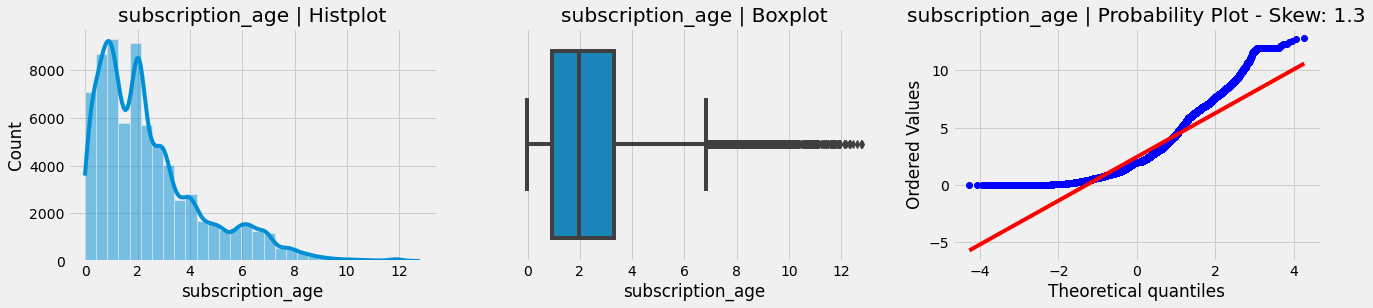

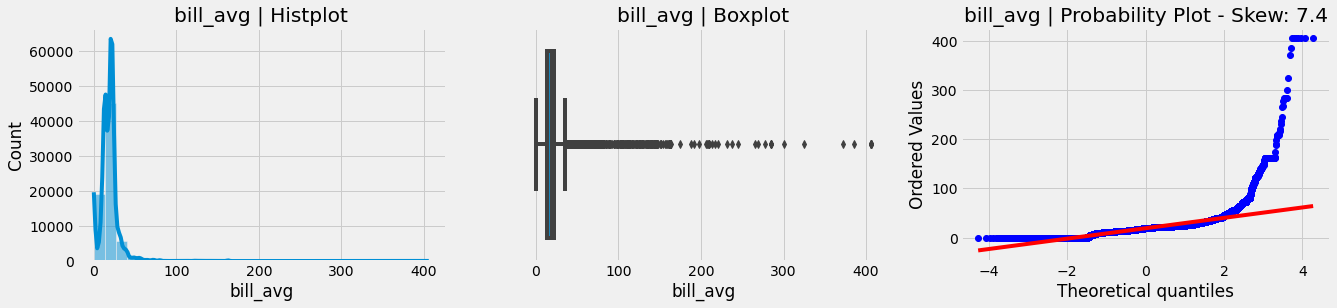

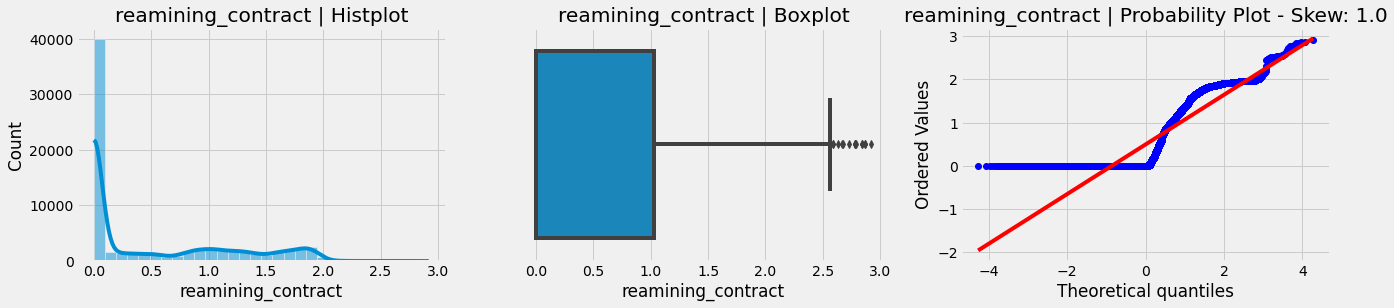

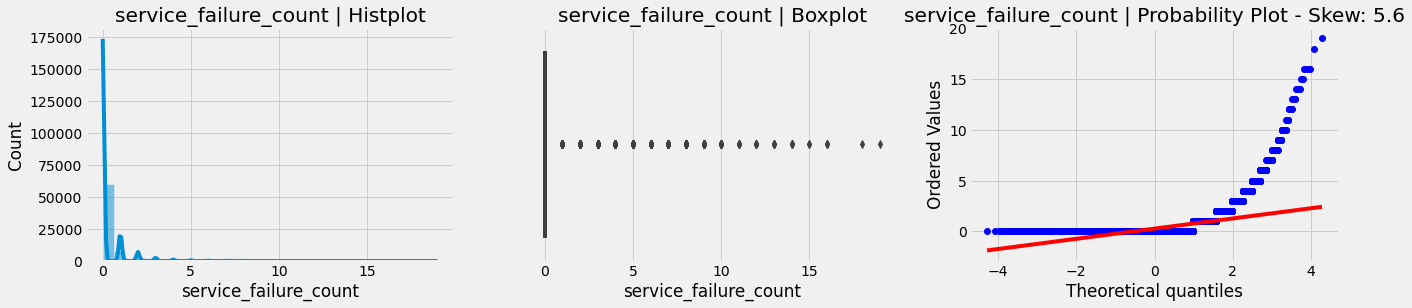

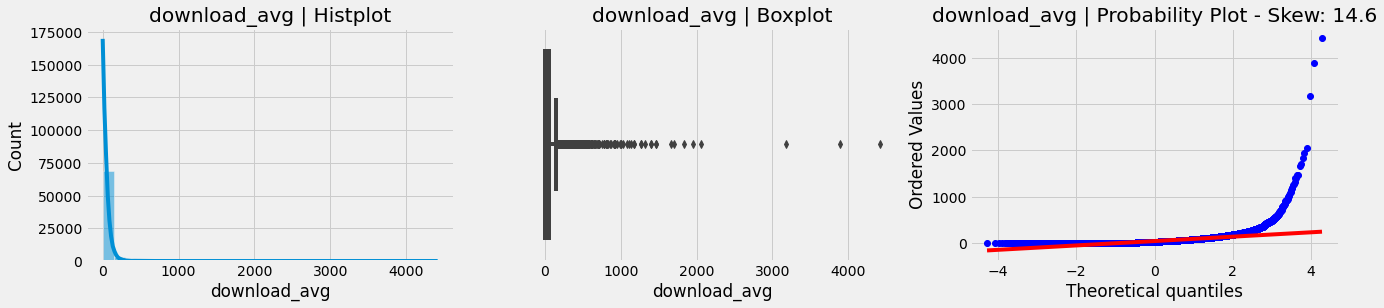

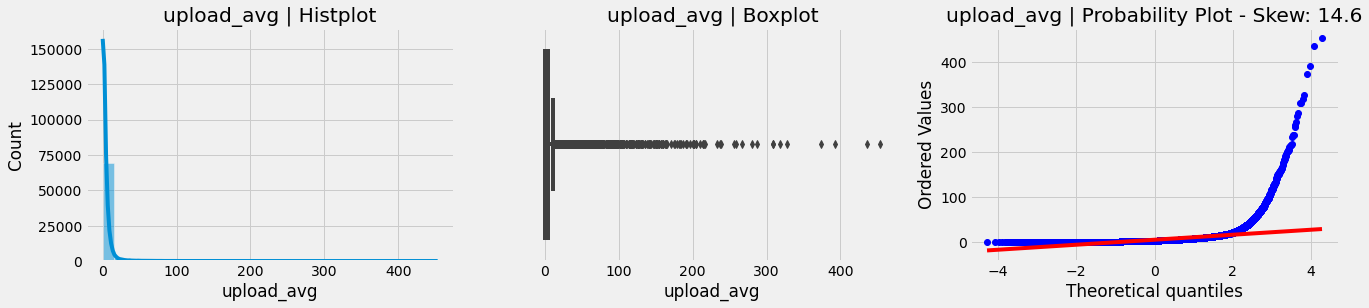

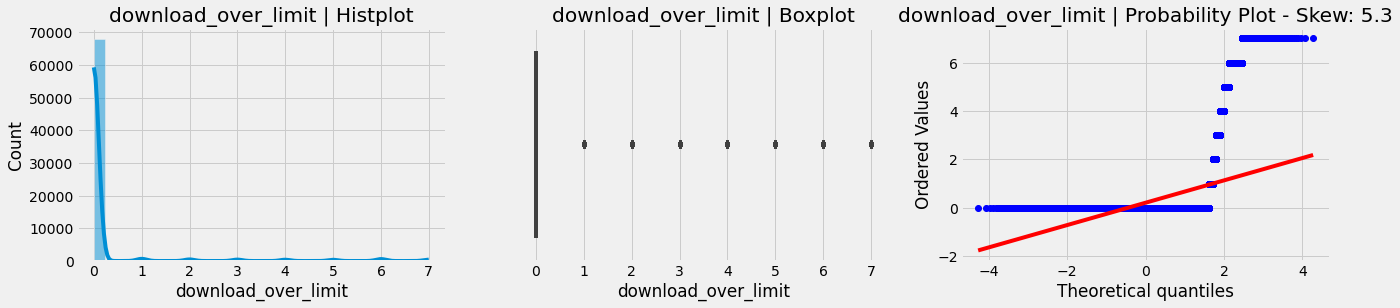

In [23]:
for i in col_num:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(df_num[i],kde=True, ax=ax[0], bins=30)
    sns.boxplot(df_num[i], ax=ax[1])
    probplot(df_num[i], plot=ax[2])
    skew_val=round(df_num[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

>- Most of the new customers with a subscription age of 0-3 years, and have a skewness distribution
>- Most customer have bill averange from 10-30, and have a skewness distribution
>- Most of customer dont have remaining contract it means that there is a possibility of churn customers compared to those who still have contract left, and have a skewness distribution
>- Most of customer dont have complaints, and the distributin data is skewness
>- Most of customer have huge download and uplaod average, and have a skewness distribution
>- Most of customer dont reach download limit, and have a skewness distribution
>-**Overall data distributin is not a normal distribution**

# Data Preprocessing

**At this stage I will determine what features will be used to predict whether someone will churn or not. The method used for numerical features is based on the value variance inflation factor**

In [24]:
X1 = df_num.copy()
vif_df = pd.DataFrame()
vif_df["Feature"] = X1.columns
vif_df["VIF"] = [vif(X1.values, i) for i in range(len(X1.columns))]
vif_df

,Feature,VIF
0,subscription_age,1.927457
1,bill_avg,2.608298
2,reamining_contract,1.426018
3,service_failure_count,1.120799
4,download_avg,2.482383
5,upload_avg,1.732576
6,download_over_limit,1.045515


>There is no high multicollinearity feature, namely the multicollinearity value is more than 5 because the higher the multicol level, the greater the possibility of redundant features

**Using feature importance selection**

In [25]:
data = df.copy()
feature_drop = ['id','churn']
X = data.drop(feature_drop, axis=1)
y = data['churn']

X['is_tv_subscriber'].replace({'no':0, 'yes':1}, inplace=True) # impute kategori to numerik
X['is_movie_package_subscriber'].replace({'no':0, 'yes':1}, inplace=True) # impute kategori to numerik

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifier

[0.0695829  0.03597452 0.07289209 0.06929715 0.59799078 0.00956273
 0.07196258 0.0592243  0.01351295]


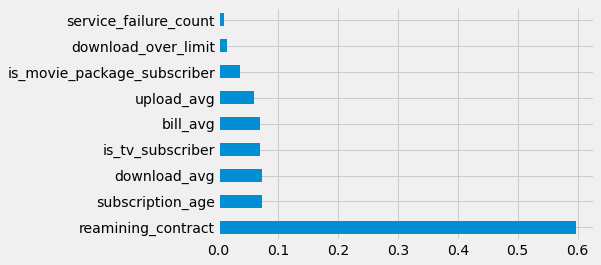

In [27]:
# Feature importance visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

**Apply feature selection based on model**

In [28]:
data = df.copy()
feature_drop = ['id','churn','service_failure_count','download_over_limit']
X = data.drop(feature_drop, axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
X_train

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
55807,yes,yes,1.98,10,0.00,0.0,0.0
64140,yes,yes,0.71,30,1.26,98.5,8.5
68990,yes,yes,0.21,18,1.76,9.5,1.4
16904,yes,yes,6.69,15,0.92,108.9,10.7
5440,yes,no,3.76,23,0.00,10.1,0.6
...,...,...,...,...,...,...,...
36630,yes,no,1.66,22,0.00,4.7,0.5
43888,yes,yes,2.54,12,0.00,77.8,3.4
25736,no,no,0.64,17,0.00,0.0,0.0
11386,yes,yes,6.91,15,1.29,155.6,6.2


**Build pipeline**

In [30]:
# Define categorical columns
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['is_tv_subscriber', 'is_movie_package_subscriber']
Numerical columns are: ['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg', 'upload_avg']


In [31]:
preprocessing = ColumnTransformer([
        ('numerical', MinMaxScaler(), numerical),
        ('categorical', OneHotEncoder(), categorical)], remainder = 'passthrough')

# Define and Training Model

## LogisticRegression

In [32]:
log = LogisticRegression(fit_intercept=True, penalty='l1', C=0.5, solver='liblinear')
log_pipeline = Pipeline([
     ('preprocessing', preprocessing),
     ('model', log)])
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', MinMaxScaler(),
                                                  ['subscription_age',
                                                   'bill_avg',
                                                   'reamining_contract',
                                                   'download_avg',
                                                   'upload_avg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['is_tv_subscriber',
                                                   'is_movie_package_subscriber'])])),
                ('model',
                 LogisticRegression(C=0.5, penalty='l1', solver='liblinear'))])

In [33]:
y_pred_train = log_pipeline.predict(X_train)
y_pred = log_pipeline.predict(X_test)
print('training set accuracy', accuracy_score(y_train,y_pred_train).round(2))
print('test set accuracy', round((accuracy_score(y_test,y_pred)), 2))

training set accuracy 0.87
test set accuracy 0.87


>**Metrics are not significantly different, so the data is not overfit**

test set accuracy 0.87
test set roc,auc 0.87


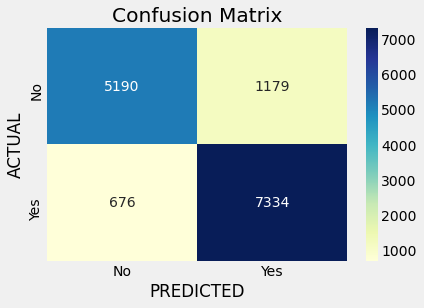

In [34]:
print('test set accuracy', round((accuracy_score(y_test,y_pred)), 2))
print('test set roc,auc', round((roc_auc_score(y_test,y_pred)), 2))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

**Cross validation logistic regression**

In [35]:
def display_scores(cross_val):
    print("Accuracy:", cross_val)
    print("Mean:", cross_val.mean().round(2))
    print("Standard deviation:", cross_val.std().round(2))

In [36]:
X_train_transform = preprocessing.transform(X_train)

In [37]:
cross_log = cross_val_score(log, X_train_transform, y_train, scoring="accuracy", cv=5)
display_scores(cross_log)

Accuracy: [0.87055551 0.86655655 0.875163   0.86690429 0.86819684]
Mean: 0.87
Standard deviation: 0.0


**With cross validation methode proved model is not overfit**

## RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_pipeline = Pipeline([
     ('preprocessing', preprocessing),
     ('model', rf)])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', MinMaxScaler(),
                                                  ['subscription_age',
                                                   'bill_avg',
                                                   'reamining_contract',
                                                   'download_avg',
                                                   'upload_avg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['is_tv_subscriber',
                                                   'is_movie_package_subscriber'])])),
                ('model',
                 RandomForestClassifier(max_leaf_nodes=16, n_estimators=500,
                                        random_state=42))])

In [39]:
y_pred_train2 = rf_pipeline.predict(X_train)
y_pred2 = rf_pipeline.predict(X_test)
print('training set accuracy', accuracy_score(y_train,y_pred_train2).round(2))
print('test set accuracy', round((accuracy_score(y_test,y_pred2)), 2))

training set accuracy 0.94
test set accuracy 0.94


**Metrics are not significantly different, so the data is not overfit**

**Cross validation random forest**

test set accuracy 0.94
test set roc,auc 0.94


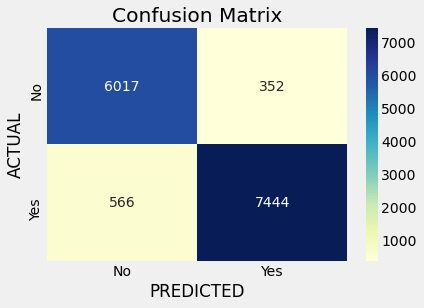

In [40]:
print('test set accuracy', round((accuracy_score(y_test,y_pred2)), 2))
print('test set roc,auc', round((roc_auc_score(y_test,y_pred2)), 2))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

In [41]:
cross_rf = cross_val_score(rf, X_train_transform, y_train, scoring="accuracy", cv=5)
display_scores(cross_rf)

Accuracy: [0.93645136 0.93271321 0.93662523 0.93419108 0.9353156 ]
Mean: 0.94
Standard deviation: 0.0


**With cross validation methode proved model is not overfit**

## KNeighborsClassifier

**Comparing with basic model knn**

In [42]:
knn = KNeighborsClassifier()
n_neighbors = [2,3,4,5,6,7]
metric = ['manhattan','euclidean']
param_grid = {'n_neighbors': n_neighbors,
             'metric': metric}
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2,  n_jobs=-1, scoring='accuracy')

grid_pipeline_knn = Pipeline([
    ('preprocessing', preprocessing),
    ('random_grid_search', grid_knn)])
grid_pipeline_knn.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', MinMaxScaler(),
                                                  ['subscription_age',
                                                   'bill_avg',
                                                   'reamining_contract',
                                                   'download_avg',
                                                   'upload_avg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['is_tv_subscriber',
                                                   'is_movie_package_subscriber'])])),
                ('random_grid_search',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['manhattan', 'euclidean

In [43]:
grid_pipeline_knn.named_steps['random_grid_search'].best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [44]:
grid_pipeline_knn.named_steps['random_grid_search'].best_estimator_

KNeighborsClassifier(metric='manhattan')

In [45]:
y_pred3 = grid_pipeline_knn.predict(X_test)
print('test set accuracy', round((accuracy_score(y_test,y_pred3)), 2))

test set accuracy 0.93


test set accuracy 0.93
test set roc,auc 0.93


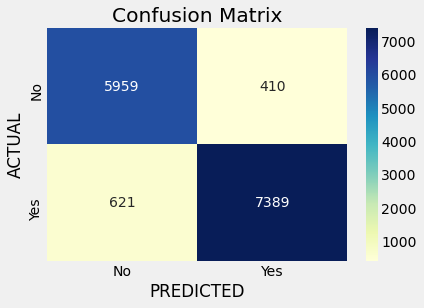

In [46]:
print('test set accuracy', round((accuracy_score(y_test,y_pred3)), 2))
print('test set roc,auc', round((roc_auc_score(y_test,y_pred3)), 2))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

**Comparing each model**

In [47]:
test = round((accuracy_score(y_test,y_pred)), 2)
test2 = round((accuracy_score(y_test,y_pred2)), 2)
test3 = round((accuracy_score(y_test,y_pred3)), 2)
compare = {'Model':['LogisticRegression','RandomForest','KNeighborsClassifier']}
compare = pd.DataFrame(compare)
compare['Test'] = [test,test2,test3]
compare

,Model,Test
0,LogisticRegression,0.87
1,RandomForest,0.94
2,KNeighborsClassifier,0.93


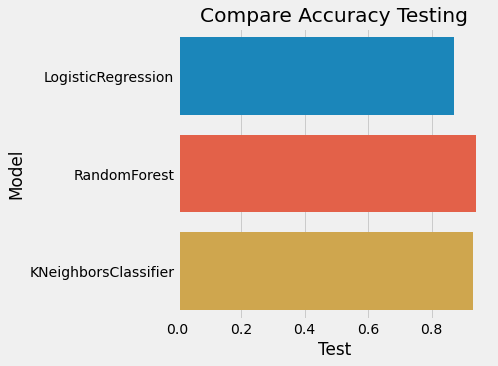

In [48]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
sns.barplot(y='Model',x='Test',data=compare)
ax.set_title('Compare Accuracy Testing');

>**Considering all models are not overfit and the greatest accuracy is random forest**

## Hyperparameter tuning random forest

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 50, 10)]
min_samples_split = [3, 6, 9, 12, 15]
min_samples_leaf = [3, 6, 9, 12, 15]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}
hyper_rf = RandomForestClassifier()
random_grid_rf = RandomizedSearchCV(estimator=hyper_rf, param_distributions=random_grid, n_iter=20, scoring='accuracy'
                                 , cv=5, verbose=2, random_state=100, n_jobs=-1)

grid_pipeline_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('random_grid_search', random_grid_rf)])
grid_pipeline_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', MinMaxScaler(),
                                                  ['subscription_age',
                                                   'bill_avg',
                                                   'reamining_contract',
                                                   'download_avg',
                                                   'upload_avg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['is_tv_subscriber',
                                                   'is_movie_package_subscriber'])])),
                ('random_grid_search',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=20, n_jobs=-1,
                     

In [50]:
grid_pipeline_rf.named_steps['random_grid_search'].best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'gini'}

In [51]:
grid_pipeline_rf.named_steps['random_grid_search'].best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=6)

**Tuning again with parameters around the best parameter**

In [53]:
y_pred_grid = grid_pipeline_rf.predict(X_test)
print('test set precision', round((accuracy_score(y_test,y_pred_grid)), 2))

test set precision 0.94


test set accuracy 0.94
test set roc,auc 0.94


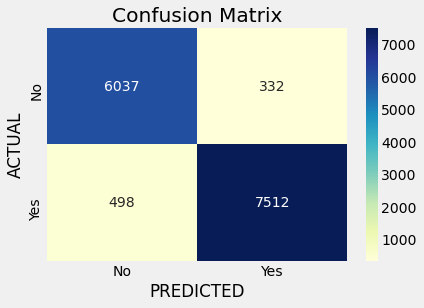

In [54]:
print('test set accuracy', round((accuracy_score(y_test,y_pred_grid)), 2))
print('test set roc,auc', round((roc_auc_score(y_test,y_pred_grid)), 2))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, ax = ax, fmt='d', cmap='YlGnBu');
# labels, title
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"]);

# Model Inference

In [55]:
X_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
55807,yes,yes,1.98,10,0.00,0.0,0.0
64140,yes,yes,0.71,30,1.26,98.5,8.5
68990,yes,yes,0.21,18,1.76,9.5,1.4
16904,yes,yes,6.69,15,0.92,108.9,10.7
5440,yes,no,3.76,23,0.00,10.1,0.6


In [56]:
print(X_train.shape)

(57514, 7)


In [57]:
col=X_train.columns.to_list()
val=[['yes', 'yes', 1.98, 10, 0, 0, 0.]]
new_data=pd.DataFrame(val,columns=col)
new_data

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
0,yes,yes,1.98,10,0,0,0.0


In [58]:
new_pred = grid_pipeline_rf.predict(new_data)
new_pred

array([1], dtype=int64)

# Overall Analysis
- Label is balance
- Most of data is not a normal distribution
- Used 7 features for modelling based on feature selection tree
- Subscription age and averange bill is not fair this is because its depend of speed and package each customer
- Most customer have download speed 1000 and upload speed 100
- What must be considered are customer who subscribe to TV and customer who do not subscribe to movies because they have the largest churn
- Most of the customers who reach download over limit is churn this is probably because they pay more

# Model Analysis
- Measurement used accuracy and roc,auc
- Model Logistic Regression not overfit
- Model Random Forest not overfit
- With the basic model KNN obtained accuracy 0.93 and roc,auc 0.93 it means that with this data it is quite good with the basic model
- Obtained accuracy and roc, auc for logistic regression model is 0.87
- Obtained accuracy and roc, auc for random forest model is 0.94
- There is no difference after tuning
- Based on the results, it can be said that the model is good enough to predict customers who stay and move

In [59]:
my_model = grid_pipeline_rf
joblib.dump(my_model, "final_model.pkl")
my_model_loaded = joblib.load("final_model.pkl")